<h1 style="text-align:center"> Self Driving Car </h1>

<h3>Introduction</h3>

In this project, I will show how to program a self-driving car using <b>Deep Learning</b>, that is to say, steering of the car will not involve human intervention. <br> 
For that we are going to use Udacity's simulator which was built using <a href="https://unity3d.com/fr"> Unity</a>.<br>
For those interested, the link for the simulator is the following one : <a href="https://github.com/udacity/self-driving-car-sim">Car simulator </a>

<img src="sim_image.png" alt="Udacity simulator" width="75%" height="75%">

<h3>Importing libraries</h3>

In [68]:
import os # Command-line 
 
import pandas as pd # DataFrame manipulation
import numpy as np # Statistical tools

# Plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline  

# Image processing
from PIL import Image

# Train/Test set split using Scikit-Learn
from sklearn.model_selection import train_test_split

In [ ]:
# Keras
from keras import layers
from keras.models import Sequential 
from keras.layers import Input, Dense

<h3>Loading data generated</h3>

In [39]:
DATA_PATH = "car_data/"

def fetch_data(data_path=DATA_PATH):
    try:
        names = ['center', 'left', 'right', 
                 'steering angle', 'speed', 'brake', 'throttle'] 
        csv_path = os.path.join(DATA_PATH, "driving_log.csv")
        data = pd.read_csv(csv_path, names=names)
    except:
        print("Could not find csv file")
    
    return data


In [53]:
data = fetch_data()
data.head()

,center,left,right,steering angle,speed,brake,throttle
0,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,0.0,1,0,6.695884
1,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,0.0,1,0,8.739202
2,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,-0.1,1,0,9.633597
3,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,-0.3,1,0,10.497940
4,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,-0.5,1,0,11.323150


<h3>Preprocessing</h3>

The generated data comes from a Windows computer and this program will be used on a Linux computer to train the data. <br>
As such, the directory images of the center, left and right cameras need to be changed.

In [54]:
PATH_IMG = '/home/lamel/Documents/Car_project/car_data/IMG/'

In [55]:
def center_camera_path_change(data):
    for center in data['center']:
        data['center'] = PATH_IMG + center[-34:]

def left_camera_path_change(data):
    for left in data['left']:
        data['left'] = PATH_IMG + left[-32:]
        
def right_camera_path_change(data):
    for right in data['right']:
        data['right'] = PATH_IMG + right[-33:]

In [56]:
center_camera_path_change(data)
left_camera_path_change(data)
right_camera_path_change(data)

In [57]:
data.head()

,center,left,right,steering angle,speed,brake,throttle
0,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,0.0,1,0,6.695884
1,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,0.0,1,0,8.739202
2,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,-0.1,1,0,9.633597
3,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,-0.3,1,0,10.497940
4,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,/home/lamel/Documents/Car_project/car_data/IMG...,-0.5,1,0,11.323150


Quick sanity check that images have the expected file path:

In [62]:
print(data['center'][0])
print(data['left'][0])
print(data['right'][0])

/home/lamel/Documents/Car_project/car_data/IMG/center_2017_12_06_08_49_10_856.jpg
/home/lamel/Documents/Car_project/car_data/IMG/left_2017_12_06_08_49_10_856.jpg
/home/lamel/Documents/Car_project/car_data/IMG/right_2017_12_06_08_49_10_856.jpg


<h3>Split the dataset</h3>

Now we will split the data into the X features and Y labels (steering angle) and
return the train and validation set

In [63]:
def split_train_validation(data, valid_ratio):
    # We store the camerage images as our input data
    X = data[['center', 'left', 'right']].values
    # Steering angle is what we want to predict
    y = data['steering angle'].values
    
    # Split into training/test set 
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

In [64]:
X_train, X_valid, y_train, y_valid = split_train_validation(data, 0.2)
print("X_train.shape:", X_train.shape, "; X_valid.shape:", X_valid.shape)
print("y_train.shape:", y_train.shape, "; y_valid.shape:", y_valid.shape)

X_train.shape: (78, 3) ; X_valid.shape: (20, 3)
y_train.shape: (78,) ; y_valid.shape: (20,)


We test if we can load an image successfully using PIL <i>Image.open</i> & Matplolib <i>imshow</i> (to show in the notebook) 

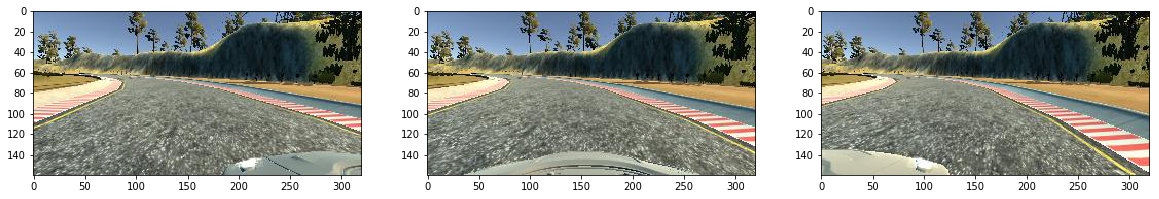

In [84]:
img_1 = X_train[0][0]
img_center = Image.open(img_1)

img_2 = X_train[0][1]
img_left = Image.open(img_2)

img_3 = X_train[0][2]
img_right = Image.open(img_3)

plt.figure(1, figsize=(20, 12))
plt.subplot(332)
plt.imshow(img_center)

plt.subplot(331)
plt.imshow(img_left)

plt.subplot(333)
plt.imshow(img_right)

plt.show()